#Exercise 1: Air Resistance Scaling with Velocity

###Code plots the linear drag force and quadratic drag force expected from physics calculations on top of one another, then shows the D*v of three different objects with differing velocities and diameters

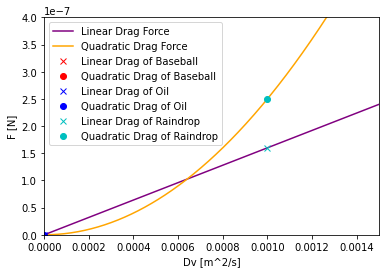

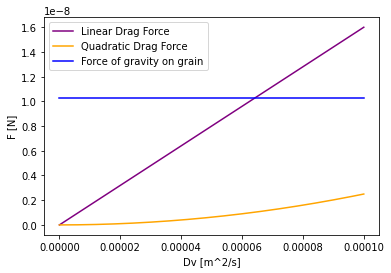

,velocity,diameter,Dv,LDrag,QDrag
mass,,,,,
Baseball,5.00000,0.070000,3.500000e-01,5.600000e-05,3.062500e-02
Oil,0.00005,0.000002,7.500000e-11,1.200000e-14,1.406250e-21
Raindrop,1.00000,0.001000,1.000000e-03,1.600000e-07,2.500000e-07


In [ ]:
#Harlan
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import pi
# CONSTANTS =======================
B = 1.6e-4   #Ns/m^2
C = 0.25     #Ns^2/m^4

# 1b Constants
D_baseball = 7/100  #m
v_baseball = 5      #m/s
D_oil      = 1.5e-6 #m
v_oil      = 5e-5   #m/s
D_raindrop = 1/1000 #m
v_raindrop = 1      #m/s

# FUNCTIONS =======================
df = pd.DataFrame({'Dv': np.linspace(0, 0.003, 1000)}) #Make our first column in Pandas dataframe
# Create new columns from initial column
df['LDrag'] = B*df['Dv']
df['QDrag'] = C*df['Dv']**2
#Finding where QDrag = LDrag
df['isClose'] = np.isclose(df['LDrag'], df['QDrag'])
#1b Dataframe setup
data_1b = {
    'mass'     : ['Baseball', 'Oil', 'Raindrop'],
    'velocity' : [v_baseball, v_oil, v_raindrop],
    'diameter' : [D_baseball, D_oil, D_raindrop]
}
df_1b = pd.DataFrame(data_1b)
df_1b['Dv'] = df_1b['velocity']*df_1b['diameter'] #Getting Dv
#Same math as above
df_1b['LDrag'] = B*df_1b['Dv']
df_1b['QDrag'] = C*df_1b['Dv']**2
df_1b.set_index('mass', inplace=True)
#Pandas wasn't playing nice so this is a workaround so we can finish on time.
BDv       = df_1b.loc['Baseball']['Dv']
BLDrag    = df_1b.loc['Baseball']['LDrag']
BQDrag    = df_1b.loc['Baseball']['QDrag']
ODv       = df_1b.loc['Oil']['Dv']
OLDrag    = df_1b.loc['Oil']['LDrag']
OQDrag    = df_1b.loc['Oil']['QDrag']
RDv       = df_1b.loc['Raindrop']['Dv']
RLDrag    = df_1b.loc['Raindrop']['LDrag']
RQDrag    = df_1b.loc['Raindrop']['QDrag']

#Plotting with pandas dataframe.
#I KNEW there was a better way
ax = df.plot(x='Dv', y='LDrag', color='purple', label='Linear Drag Force')
df.plot(x='Dv', y='QDrag', color='orange', label='Quadratic Drag Force', ax=ax)
#Better way breaks down right here
ax.plot(BDv, BLDrag, 'xr', label='Linear Drag of Baseball')
ax.plot(BDv, BQDrag, 'or', label='Quadratic Drag of Baseball')
ax.plot(ODv, OLDrag, 'xb', label='Linear Drag of Oil')
ax.plot(ODv, OQDrag, 'ob', label='Quadratic Drag of Oil')
ax.plot(RDv, RLDrag, 'xc', label='Linear Drag of Raindrop')
ax.plot(RDv, RQDrag, 'oc', label='Quadratic Drag of Raindrop')
#df_1b.loc['Baseball'].plot.scatter(x='Dv', y='LDrag', style='rx', label='Linear Force on Baseball', ax=ax)
ax.set_xlabel('Dv [m^2/s]')
ax.set_ylabel('F [N]')
ax.set_xlim(0.000, 0.0015)
ax.set_ylim(0, 4e-7)
ax.legend()
plt.show()

#2A information ==================================
p = 2e3 #kg/m^3
D = 1e-4 #m
V = 4/3*pi*(D/2)**3
m = p*V
F_grain_grav = m*9.81

df2a = pd.DataFrame({'v': np.linspace(0, 1, 1000)})
df2a['Dv'] = df2a['v']*D
df2a['LDrag'] = B*df2a['Dv']
df2a['QDrag'] = C*df2a['Dv']**2
df2a['fgrav'] = F_grain_grav


ax2 = df2a.plot(x='Dv', y='LDrag', color='purple', label='Linear Drag Force')
df2a.plot(x='Dv', y='QDrag', color='orange', label='Quadratic Drag Force', ax=ax2)
df2a.plot(x='Dv', y='fgrav', color='blue', label='Force of gravity on grain', ax=ax2)
ax2.set_xlabel('Dv [m^2/s]')
ax2.set_ylabel('F [N]')
plt.show()
df_1b

#Exercise 2: Vertical Motion under the action of Air Resistance

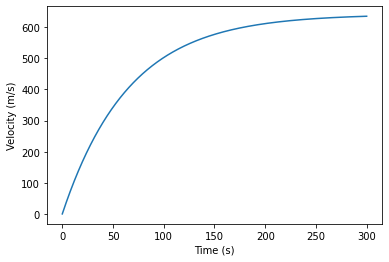

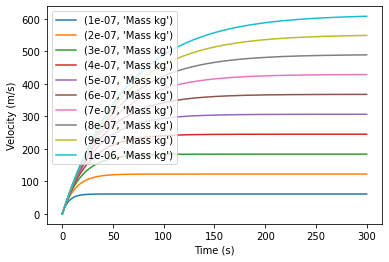

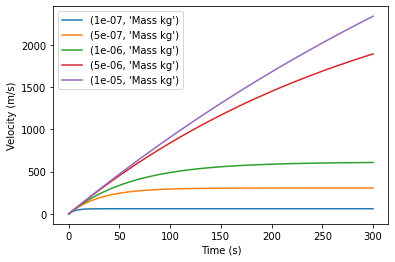

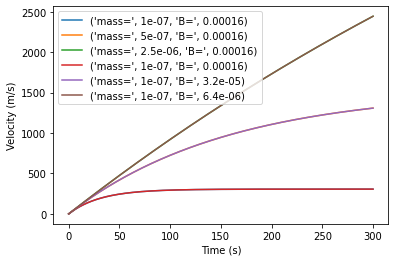

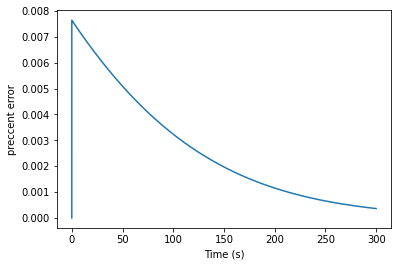

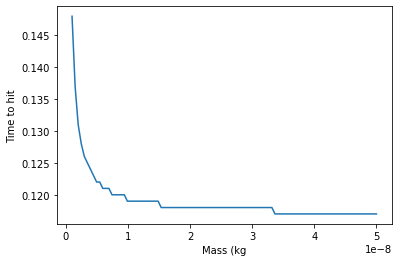

In [ ]:
#Jakob
import numpy as np
import math
import matplotlib.pyplot as plt

g = 9.81 # acelaration due to gravity
B = 1.6*10**(-4) # the "B" Value for air resistance
D = 10**(-4) #diameter of the sphere
m = (2*10**(3))*((4/3)*math.pi*(5*10**(-4))**3) # mass of the partical
t=0 # time
dt=0.01 # change in time
v=0 # velocity
t_lim = 300 # the time limit of the loop
# lists for storying the velocity and time
time_list=[t]
vel_list=[v]


while t<t_lim: # main loop for the procces
    dv=g*dt-((B*D/m)*v*dt) # calcuales change in velocity
    v=dv+v # adds change in velocity to to the velocity
    t=dt+t # adds change in time to time
    # stores the values for t and v in there respective lists
    time_list.append(t)
    vel_list.append(v)

#plots time v velocity
plt.figure(1)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.plot(time_list,vel_list)

#section for the range of masses
plt.figure (2)
M = np.linspace(0.0000001,0.000001, num=10) # the range of mass list
for i in range(len(M)):
    t=0
    v=0
    time_list_M = [t]
    vel_list_M = [v]
    while t<t_lim: # main loop for the procces
        dv=g*dt-((B*D/M[i])*v*dt) # calcuales change in velocity
        v=dv+v # adds change in velocity to to the velocity
        t=dt+t # adds change in time to time
        # stores the values for t and v in there respective lists
        time_list_M.append(t)
        vel_list_M.append(v)
    plt.plot(time_list_M,vel_list_M,label=(M[i],"Mass kg"))

# inforation with for the talbe.
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.legend()


#Section for large mass

plt.figure(3)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
M=[0.0000001,0.0000005,0.000001,0.000005,0.00001]
for i in range(len(M)):
    t=0
    v=0
    time_list_M = [t]
    vel_list_M = [v]
    while t<t_lim: # main loop for the procces
        dv=g*dt-((B*D/M[i])*v*dt) # calcuales change in velocity
        v=dv+v # adds change in velocity to to the velocity
        t=dt+t # adds change in time to time
        # stores the values for t and v in there respective lists
        time_list_M.append(t)
        vel_list_M.append(v)
    plt.plot(time_list_M,vel_list_M,label=(M[i],"Mass kg"))
plt.legend()

#section for changes in m and b being similar
plt.figure(4)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
M=[0.0000001,0.0000005,0.0000025]
B=[0.00016,0.000032,0.0000064]
for i in range(len(M)):
    t=0
    v=0
    time_list_M = [t]
    vel_list_M = [v]
    while t<t_lim: # main loop for the procces
        dv=g*dt-((B[1]*D/M[i])*v*dt) # calcuales change in velocity
        v=dv+v # adds change in velocity to to the velocity
        t=dt+t # adds change in time to time
        # stores the values for t and v in there respective lists
        time_list_M.append(t)
        vel_list_M.append(v)
    plt.plot(time_list_M,vel_list_M,label=("mass=",M[i],"B=",B[0]))


for i in range(len(B)):
    t=0
    v=0
    time_list_B = [t]
    vel_list_B = [v]
    while t<t_lim: # main loop for the procces
        dv=g*dt-((B[i]*D/M[1])*v*dt) # calcuales change in velocity
        v=dv+v # adds change in velocity to to the velocity
        t=dt+t # adds change in time to time
        # stores the values for t and v in there respective lists
        time_list_B.append(t)
        vel_list_B.append(v)
    plt.plot(time_list_B,vel_list_B,label=("mass=",M[0],"B=",B[i]))

plt.legend()

#section for 2d and the comparison to anilitical solution

g = 9.81 # acelaration due to gravity
B = 1.6*10**(-4) # the "B" Value for air resistance
D = 10**(-4) #diameter of the sphere
m = (2*10**(3))*((4/3)*math.pi*(5*10**(-4))**3) # mass of the partical
t=0 # time
dt=0.01 # change in time
v=0 # velocity
t_lim = 300 # the time limit of the loop
# lists for storying the velocity and time
time_list=[t]
vel_list=[v]
vel_list_an=[v]
error_list=[0]

while t<t_lim: # main loop for the numerical solution
    dv=g*dt-((B*D/m)*v*dt) # calcuales change in velocity
    v=dv+v # adds change in velocity to to the velocity
    t=dt+t # adds change in time to time
    # stores the values for t and v in there respective lists
    time_list.append(t)
    vel_list.append(v)
t=0.01
v=0
while t<t_lim+0.01: #anilitical solution block
    v=(m*g/(B*D))*(1-math.exp(-(B*D)*t/m))
    t=t+dt
    vel_list_an.append(v)


for i in range(len(time_list)-1): # calculates the precent error from alilitical and numerical
    Error= abs((vel_list[i+1]-vel_list_an[i+1])/vel_list_an[i+1])*100
    error_list.append(Error)
#plots time precent error
plt.figure(5)
plt.xlabel("Time (s)")
plt.ylabel("preccent error")
plt.plot(time_list,error_list)


#section for 2 e



t=0 # time
dt=0.001 # change in time
v=0 # velocity
t_lim = 300 # the time limit of the loop
# lists for storying the velocity and time
time_list=[t]
vel_list_an=[v]
Mass=np.linspace(0.000000001,0.00000005,num=100)
pos=-5
time_hit_list=[]

for i in range(len(Mass)): #loops for all masses in list
    pos=-5
    t=0
    while pos<=0:# fined time to hit ground
        pos=v*t+pos
        v=(Mass[i]*g/(B*D))*(1-math.exp(-(B*D)*t/Mass[i]))
        t=t+dt
    time_hit_list.append(t)

#plosts graph for this section
plt.figure(6)
plt.xlabel("Mass (kg")
plt.ylabel("Time to hit")
plt.plot(Mass,time_hit_list)



plt.show()

#Exercise 3: Projectile Motion under Air Resistance

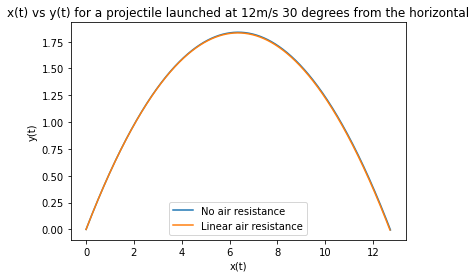

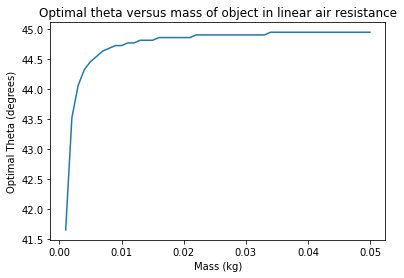

In [ ]:
#Derek
import matplotlib.pyplot as plt
import numpy as np
from math import pi, cos, sin
from operator import itemgetter

B = 1.6e-4  #Ns/m^2   #Constant
C = 0.25    #Ns^2/m^4 #Constant

D = 1       #diamater of object (m)
g = 9.81    #m/s^2
t = 0       #s
v = 12      #m/s
dt = 0.001  #s 
b = B*D     #linear term
m = 20      #Kg 
npoints = 2000  #Changes accuracy of graph
theta = 30 #degrees
theta = pi*theta/180  #Conversion to radians

vx = v*cos(theta)  #Velocity in x direction
vy = v*sin(theta)  #Velocity in y direction

vx1 = vx  #Seperate variables for linear plot
vy1 = vy


initialConditions = [{
    'x(t)': 0.0, 'y(t)': 0.0, 
    'x1(t)': 0.0, 'y1(t)': 0.0}]  #Initial conditions for storing values
                                  #in graph

for cond in initialConditions:
  xoft = cond['x(t)']
  yoft = cond['y(t)']
  linxoft = cond['x1(t)']
  linyoft = cond['y1(t)']
  t = 0
  list_xoft = [xoft]
  list_yoft = [yoft]
  list_lin_xoft = [linxoft]
  list_lin_yoft = [linyoft]
  list_time = [t]

  for nsteps in range(1,npoints): #Run through once for ideal, no drag conditions
    dx = dt * vx 
    dy = dt * vy
    vy += -g*dt

    t += dt
    xoft += dx
    yoft += dy
    list_xoft.append(xoft)
    list_yoft.append(yoft)
    list_time.append(t)
    if yoft < 0: #So we don't go lower than the ground
      break

  for nsteps in range(1,npoints): #Second runthrough for linear
    vx1 += -(b/m)*vx1*dt
    vy1 += (-g -(b/m)*vy1)*dt
    dx1 = dt * vx1
    dy1 = dt * vy1
    linxoft += dx1
    linyoft += dy1
    list_lin_xoft.append(linxoft)
    list_lin_yoft.append(linyoft)
    if linyoft < 0: #So we don't go lower than the ground
        break
  
  plt.plot(list_xoft, list_yoft, label='No air resistance')
  plt.plot(list_lin_xoft, list_lin_yoft, label='Linear air resistance')
  plt.title("x(t) vs y(t) for a projectile launched at 12m/s 30 degrees from the horizontal")
  plt.xlabel('x(t)')
  plt.ylabel('y(t)')
  plt.legend()
  plt.show()

list_thetaopt=[] #Storage of optimized theta values for part b 
list_m=[] #Storage of mass values for part b 
v = 12 #reset variable

for m in np.linspace(0.001,0.05, 50):
  list_m.append(m)
  range_list = []
  for theta in np.linspace(1, 90, 2000):
    #Calculate all possible thetas from 1-90, with fractions
    thetagood = pi*theta/180  #Allows graph to display in degrees, but calculations in radians
    vx = v*cos(thetagood) #initial v(x, y)
    vy = v*sin(thetagood)
    vter = m*g/b #them Tau variables
    #We're dividing by vter, so as m increases vy/vter basically drops out.
    R = ((2*vx*vy)/g)*(1-(4/3)*(vy/vter)) #max range
    range_list.append((R, thetagood))
  opt_theta = max(range_list,key=itemgetter(0))[1] # from https://stackoverflow.com/a/13145419
  list_thetaopt.append(opt_theta*(180/pi)) #best theta in degrees
#Plotting is my favourite part
plt.plot(list_m, list_thetaopt) #Plotting mass and corresponding optimal theta
plt.title('Optimal theta versus mass of object in linear air resistance')
plt.xlabel('Mass (kg)')
plt.ylabel('Optimal Theta (degrees)')
plt.show()

#Exercise 4: Projectile Motion under Air Resistance: Part 2: Electric Boogaloo

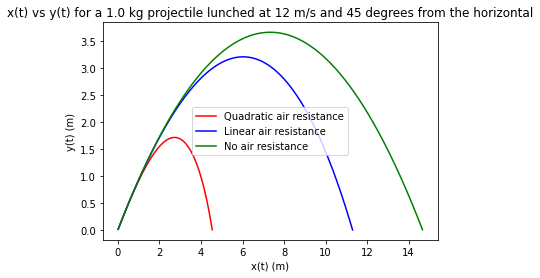

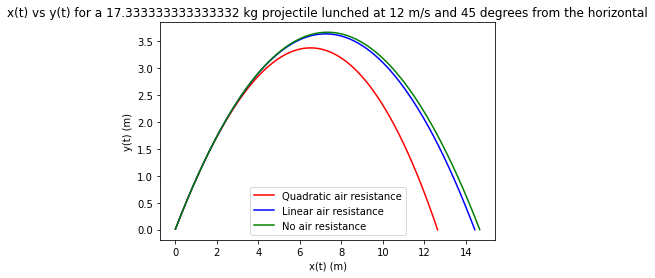

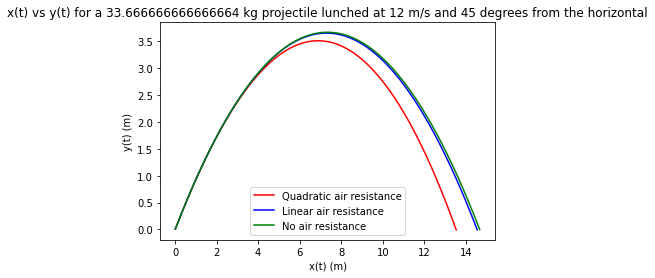

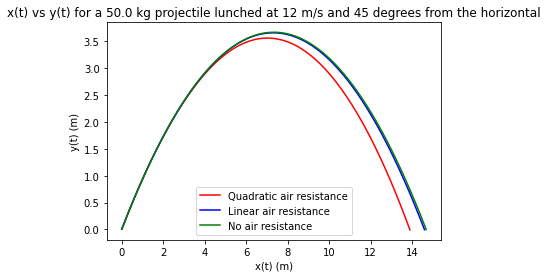

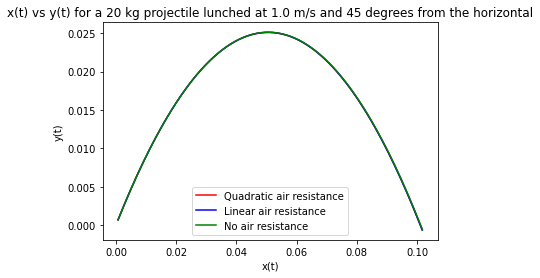

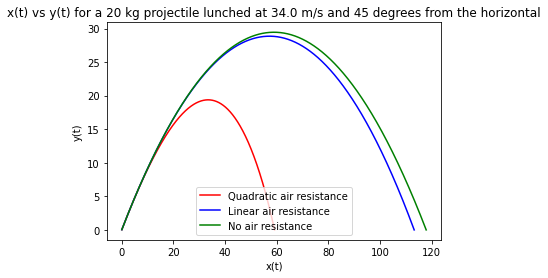

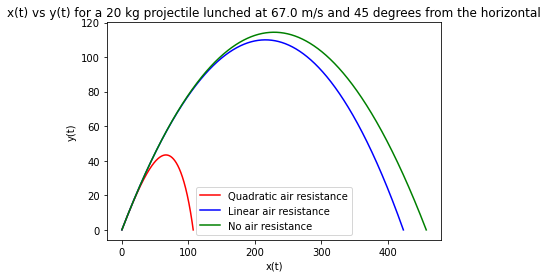

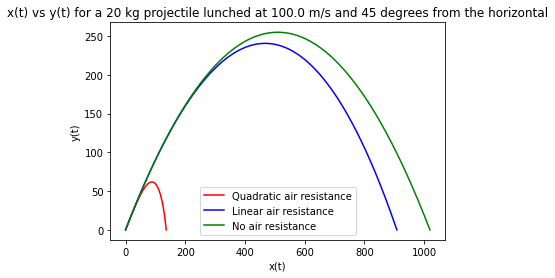

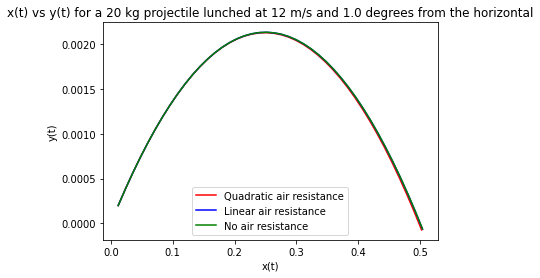

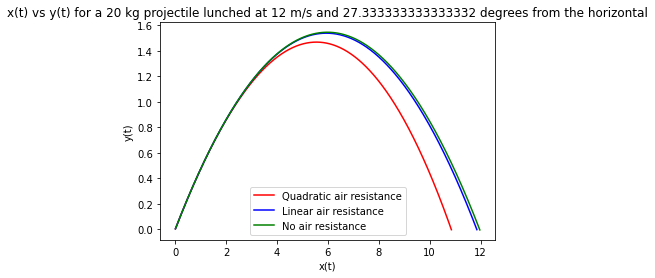

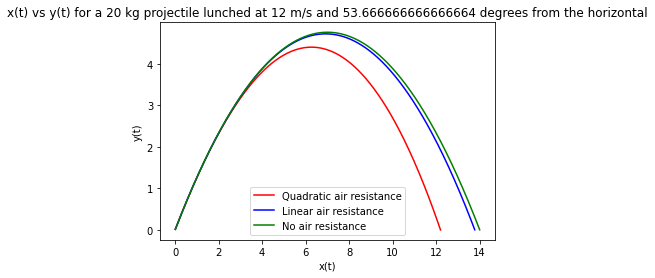

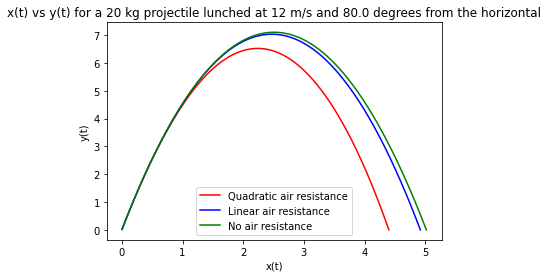

In [ ]:
#Justin
import matplotlib.pyplot as plt
import numpy as np
from math import pi, cos, sin, sqrt
# CONSTANTS =======================
B = 1.6e-4   #Ns/m^2
C = 0.25     #Ns^2/m^4

#Setup
t=0
dt= 0.001
g=9.81      #gravity (m/s^2)
D=1       #diameter of object (m)
c=C*D**2    #quadratic term 
b=B*D       #linear term
x=0
y=0

list_simplex=[]
list_simpley=[]
list_linx =[]
list_liny =[] 
list_quadx =[]
list_quady =[] 

masses=np.linspace(1,50,4)
launching_angles = np.linspace(1,80,4)
velocities=np.linspace(1,100,4)

#Functions       
def pos_update(x,y,vx,vy,dt):
    '''Updates the position of the mass'''
    x = x+vx*dt
    y = y+vy*dt
    return x,y   

def simple_update(g,vy,dt):
    '''Updates the velocity of the mass. No air resistance'''
    dvy = -g *dt
    vy+=dvy
    return vy

def linvel_update(m,g,vx,vy,b,dt):
    '''Updates the velocity of the mass. Linear air resistance'''
    dvx = -(b/m)*vx*dt
    dvy = (-g -(b/m)*vy)*dt
    vx+=dvx
    vy+=dvy     
    return vx,vy

def quadvel_update(m,g,vx,vy,c,dt):
    '''Updates the velocity of the mass. Quadratic air resistance'''
    dvx = (-(c/m) * sqrt(vx**2 +vy**2) *vx)*dt
    dvy = (-g -(c/m) * sqrt(vx**2 +vy**2) *vy)*dt
    vx+=dvx
    vy+=dvy    
    return vx,vy  

def simple_tracker(g,x,y,vx,vy,t,dt):
    '''Tracks trajectory of mass. No air resistance'''
    list_x=[]
    list_y=[]
    while y >=0:
        vy = simple_update(g,vy,dt)
        x,y = pos_update(x,y,vx,vy,dt)
        #t+=dt
        list_x.append(x)
        list_y.append(y)
    return list_x, list_y
           
def lin_tracker(m,g,x,y,vx,vy,b,t,dt): 
    '''Tracks trajectory of mass. Linear air resistance'''
    list_x=[]
    list_y=[]
    while y >=0 :
        vx, vy = linvel_update(m, g, vx, vy, b,dt)
        x, y = pos_update(x, y, vx, vy, dt)
        #t+=dt
        list_x.append(x)
        list_y.append(y)
    return list_x, list_y

def quad_tracker(m,g,x,y,vx,vy,c,t,dt):   
    '''Tracks trajectory of mass. Quadratic air resistance'''
    list_x=[]
    list_y=[]
    while y >=0 :
        vx, vy = quadvel_update(m, g, vx, vy, c,dt)
        x, y = pos_update(x, y, vx, vy, dt) 
        #t+=dt
        list_x.append(x)
        list_y.append(y)
    return list_x, list_y

for m in masses: 
  #Keeping other parameters constant
  deg=45            # Launching angle (degrees)
  theta=pi*deg/180  # rad
  v= 12             # initial velocity (m/s)
  vx = v*cos(theta) 
  vy = v*sin(theta)

  #Lists of the mass trajectory 
  list_quadx,list_quady = quad_tracker(m,g,x,y,vx,vy,c,t,dt)
  list_linx,list_liny = lin_tracker(m,g,x,y,vx,vy,c,t,dt)
  list_simplex,list_simpley = simple_tracker(g,x,y,vx,vy,t,dt)
 
  #Plots  
  plt.figure()
  plt.plot(list_quadx, list_quady,'r', label='Quadratic air resistance' )
  plt.title("x(t) vs y(t) for a {} kg projectile lunched at {} m/s and {} degrees from the horizontal". format(m,v,deg))
  plt.xlabel('x(t) (m)')
  plt.ylabel('y(t) (m)')
  plt.plot(list_linx, list_liny,'b', label='Linear air resistance' )
  plt.plot(list_simplex, list_simpley,'g', label='No air resistance')
  plt.legend()
  #plt.ylim(0,list_linx[-1]) #Visually confirm the launching angle
  plt.show()

for v in velocities:
  #Keeping other parameters constant  
  m=20                #kg
  deg=45              #Launching angle (degrees)
  theta=pi*deg/180    #rad
  vx = v*cos(theta)
  vy = v*sin(theta)

  #Lists of the mass trajectory 
  list_quadx,list_quady = quad_tracker(m,g,x,y,vx,vy,c,t,dt)
  list_linx,list_liny = lin_tracker(m,g,x,y,vx,vy,c,t,dt)
  list_simplex,list_simpley = simple_tracker(g,x,y,vx,vy,t,dt)
 
  #Plots 
  plt.figure()
  plt.plot(list_quadx, list_quady,'r', label='Quadratic air resistance' )
  plt.title("x(t) vs y(t) for a {} kg projectile lunched at {} m/s and {} degrees from the horizontal". format(m,v,deg))
  plt.xlabel('x(t)')
  plt.ylabel('y(t)')
  plt.plot(list_linx, list_liny,'b', label='Linear air resistance' )
  plt.plot(list_simplex, list_simpley,'g', label='No air resistance')
  plt.legend()
  #plt.ylim(0,list_linx[-1]) #Visually confirm the launching angle
  plt.show()

for deg in launching_angles:  
  #Keeping other parameters constant
  m=20                #kg
  theta=pi*deg/180    #rad
  v=12                #m/s
  vx = v*cos(theta)
  vy = v*sin(theta)

  #Lists of the mass trajectory 
  list_quadx,list_quady = quad_tracker(m,g,x,y,vx,vy,c,t,dt)
  list_linx,list_liny = lin_tracker(m,g,x,y,vx,vy,c,t,dt)
  list_simplex,list_simpley = simple_tracker(g,x,y,vx,vy,t,dt)
 
  #Plots
  plt.figure()
  plt.plot(list_quadx, list_quady,'r', label='Quadratic air resistance' )
  plt.title("x(t) vs y(t) for a {} kg projectile lunched at {} m/s and {} degrees from the horizontal". format(m,v,deg))
  plt.xlabel('x(t)')
  plt.ylabel('y(t)')
  plt.plot(list_linx, list_liny,'b', label='Linear air resistance' )
  plt.plot(list_simplex, list_simpley,'g', label='No air resistance')
  plt.legend()
  #plt.ylim(0,list_linx[-1]) #Visually confirm the launching angle
  plt.show()